In [1]:
# Real Estate Valuation: Data Exploration
# =======================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Set visualization styles
plt.style.use('seaborn-whitegrid')
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)

/var/folders/j3/n1zgv5yd3h9_lk6htkm9rmbc0000gn/T/ipykernel_52575/4234336463.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


In [3]:
file_path = '../data/raw/realtor-data.csv'
df = pd.read_csv(file_path)

In [4]:
df['state'].value_counts().sort_values(ascending=True)

state
New Brunswick                1
Guam                       489
Virgin Islands             895
Alaska                    2581
Vermont                   2600
Puerto Rico               3126
New Hampshire             3642
Wyoming                   4039
North Dakota              4268
South Dakota              4690
Maine                     5065
Nebraska                  6309
District of Columbia      6625
Hawaii                    7243
Rhode Island              8157
Delaware                  8628
Montana                  10059
West Virginia            12309
Connecticut              14008
Utah                     14557
Nevada                   14667
Kansas                   14858
Mississippi              16255
Idaho                    16760
Indiana                  18840
New Mexico               21074
Iowa                     23033
Arkansas                 23045
Louisiana                25815
Kentucky                 26316
Oregon                   32163
Colorado                 32293
Al

In [5]:
# Drop row with state value of 'New Brunswick'
df = df[df['state'] != 'New Brunswick']

In [7]:
pd.set_option('display.max_rows', None)
# Check data types
print("\nData Types:")
print(df.dtypes)
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())
pd.reset_option('display.max_rows')


Data Types:
brokered_by       float64
status             object
price             float64
bed               float64
bath              float64
acre_lot          float64
street            float64
city               object
state              object
zip_code          float64
house_size        float64
prev_sold_date     object
dtype: object

Missing Values:
brokered_by         4533
status                 0
price               1541
bed               481316
bath              511770
acre_lot          325589
street             10866
city                1407
state                  8
zip_code             299
house_size        568483
prev_sold_date    734297
dtype: int64


In [8]:
# Analyze missing house_size records
# Calculate percentage of missing values
missing_size = df[df['house_size'].isna()]
missing_pct = len(missing_size) / len(df) * 100

print(f"\nPercentage of rows missing house_size: {missing_pct:.2f}%")

print("For rows missing house_size:")
print(f"Total rows missing house_size: {len(missing_size)}")
print("\nOf these rows:")
print(f"Missing bed: {missing_size['bed'].isna().sum()}")
print(f"Missing bath: {missing_size['bath'].isna().sum()}")
print(f"\nMissing both bed and bath: {missing_size[['bed','bath']].isna().all(axis=1).sum()}")



Percentage of rows missing house_size: 25.53%
For rows missing house_size:
Total rows missing house_size: 568483

Of these rows:
Missing bed: 460992
Missing bath: 467320

Missing both bed and bath: 458868


#### Size, baths and beds are cruaial for prices. Let's understand the meaningness in the misisng value pattern

In [9]:
# Let's create binary indicators for missign values
df['missing_size'] = df['house_size'].isna().astype(int)
df['missing_bed'] = df['bed'].isna().astype(int)
df['missing_bath'] = df['bath'].isna().astype(int)

In [10]:
missing_by_states = df.groupby('state')['missing_size'].mean().sort_values(ascending=False)
print("Proportion of missing house_size by state (top 10):")
print(missing_by_states.head(10))

Proportion of missing house_size by state (top 10):
state
Virgin Islands    0.766480
Alaska            0.624177
Wyoming           0.533300
Wisconsin         0.505355
Maine             0.501283
South Dakota      0.498507
Tennessee         0.495850
North Carolina    0.484460
New Jersey        0.482396
Guam              0.456033
Name: missing_size, dtype: float64


/opt/homebrew/lib/python3.11/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/opt/homebrew/lib/python3.11/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/opt/homebrew/lib/python3.11/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


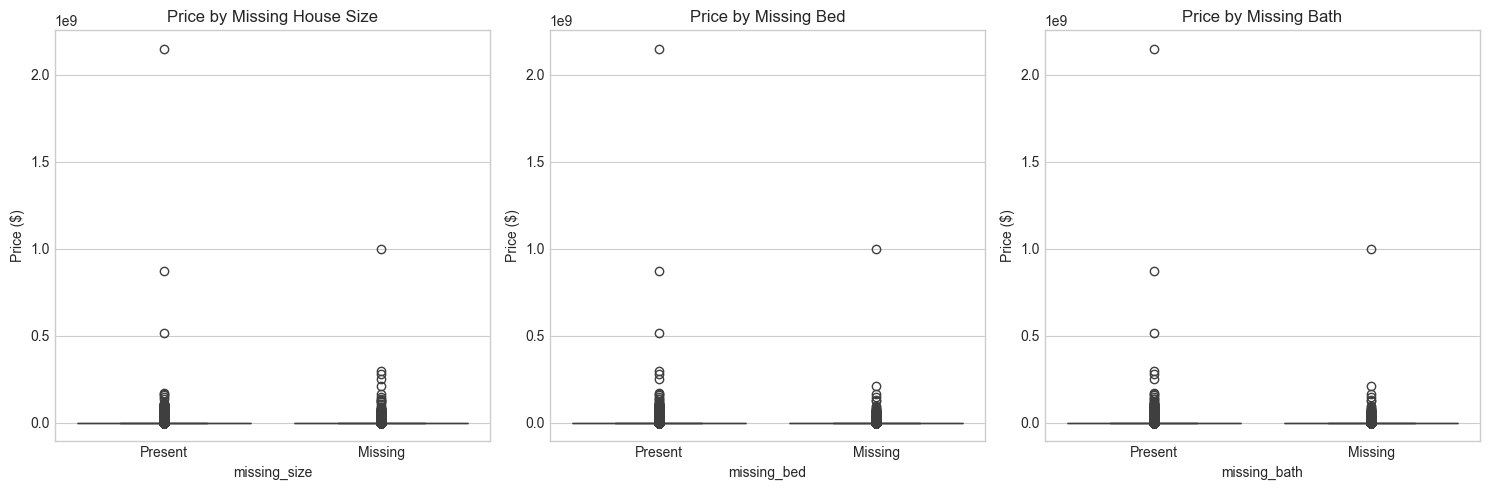

In [11]:
# Check if price distribution differs for entries with missing vs. non-missing values
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x='missing_size', y='price', data=df)
plt.title('Price by Missing House Size')
plt.xticks([0, 1], ['Present', 'Missing'])
plt.ylabel('Price ($)')

plt.subplot(1, 3, 2)
sns.boxplot(x='missing_bed', y='price', data=df)
plt.title('Price by Missing Bed')
plt.xticks([0, 1], ['Present', 'Missing'])
plt.ylabel('Price ($)')

plt.subplot(1, 3, 3)
sns.boxplot(x='missing_bath', y='price', data=df)
plt.title('Price by Missing Bath')
plt.xticks([0, 1], ['Present', 'Missing'])
plt.ylabel('Price ($)')

plt.tight_layout()
plt.show()


Proportion of missing values by status:
                missing_size  missing_bed  missing_bath
status                                                 
for_sale            0.334528     0.296076      0.294229
ready_to_build      0.000439     0.000080      1.000000
sold                0.127720     0.086174      0.095971


<Figure size 1000x600 with 0 Axes>

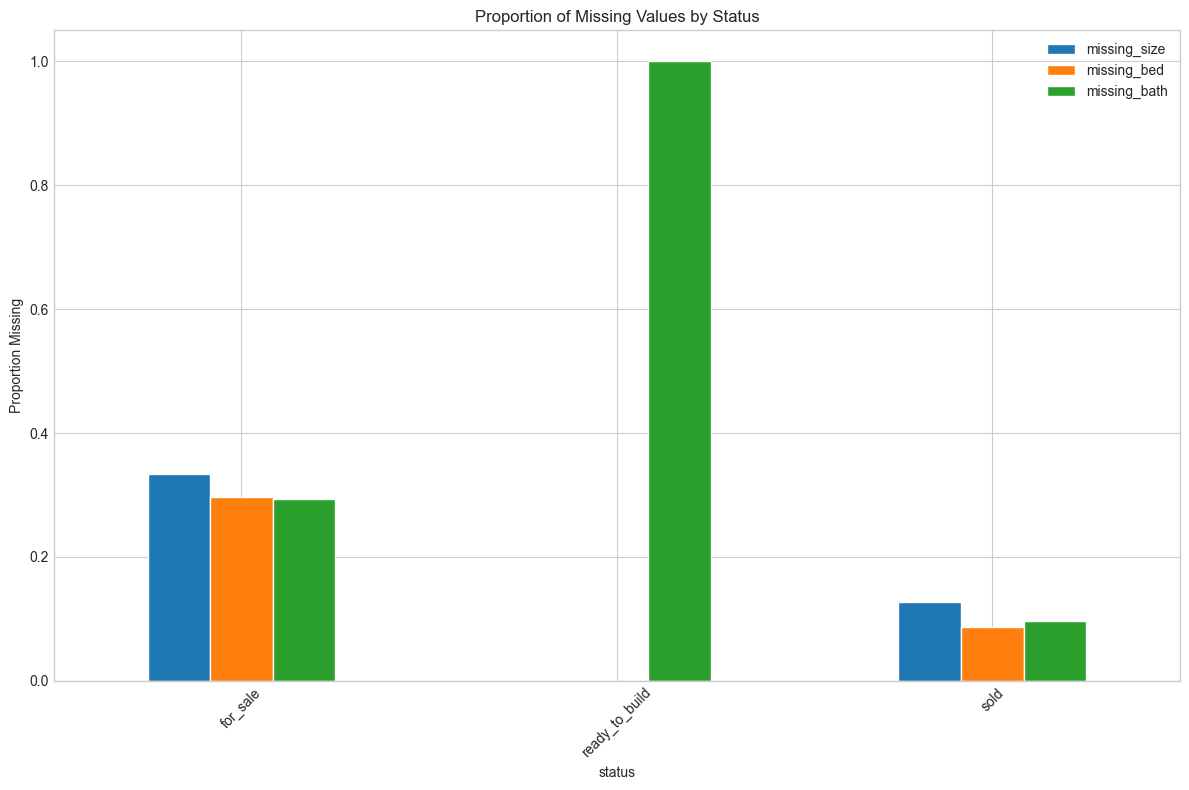

In [12]:
# Check if missing values are related to status
if 'status' in df.columns:
    missing_by_status = df.groupby('status')[['missing_size', 'missing_bed', 'missing_bath']].mean()
    print("\nProportion of missing values by status:")
    print(missing_by_status)
    
    # Visualize this relationship
    plt.figure(figsize=(10, 6))
    missing_by_status.plot(kind='bar')
    plt.title('Proportion of Missing Values by Status')
    plt.ylabel('Proportion Missing')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [13]:
# Check if acre_lot can be used to impute house_size
# First, let's look at correlation between acre_lot and house_size for non-missing values
non_missing = df[df['missing_size'] == 0]
correlation = non_missing[['acre_lot', 'house_size']].corr()
print("\nCorrelation between acre_lot and house_size:")
print(correlation)


Correlation between acre_lot and house_size:
            acre_lot  house_size
acre_lot    1.000000    0.000987
house_size  0.000987    1.000000


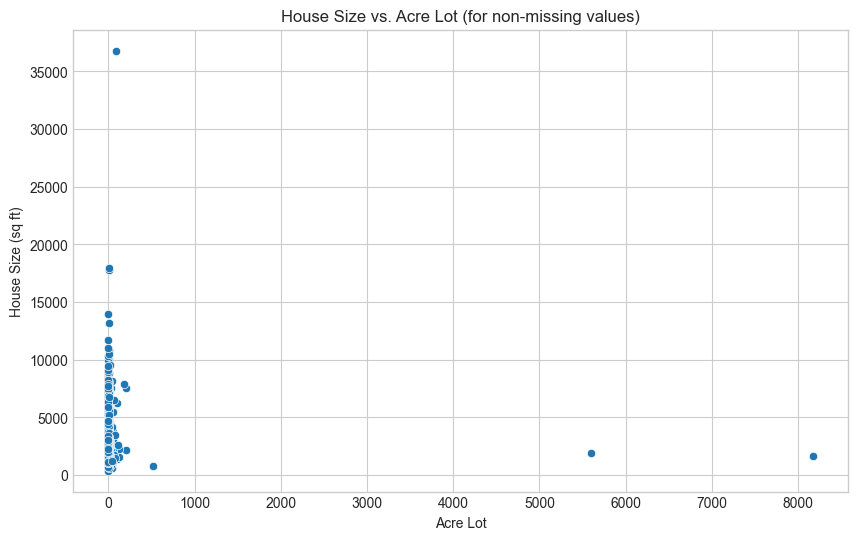

In [14]:
# Visualize relationship between acre_lot and house_size
plt.figure(figsize=(10, 6))
sns.scatterplot(x='acre_lot', y='house_size', data=non_missing.sample(min(5000, len(non_missing))))
plt.title('House Size vs. Acre Lot (for non-missing values)')
plt.xlabel('Acre Lot')
plt.ylabel('House Size (sq ft)')
plt.show()

In [15]:
# Check if missing values cluster by zip code
# Group by zip code and calculate proportion of missing values
missing_by_zip = df.groupby('zip_code')[['missing_size', 'missing_bed', 'missing_bath']].mean()

# Identify zip codes with high and low proportion of missing values
high_missing_zips = missing_by_zip[missing_by_zip['missing_size'] > 0.9].index.tolist()
low_missing_zips = missing_by_zip[missing_by_zip['missing_size'] < 0.1].index.tolist()

print(f"Number of zip codes with >90% missing house_size: {len(high_missing_zips)}")
print(f"Number of zip codes with <10% missing house_size: {len(low_missing_zips)}")

# Check 'brokered_by' field - do certain brokers tend not to report these values?
if len(df['brokered_by'].unique()) < 100:  # Only if number of unique brokers is manageable
    missing_by_broker = df.groupby('brokered_by')[['missing_size', 'missing_bed', 'missing_bath']].mean().sort_values(by='missing_size', ascending=False)
    print("\nProportion of missing values by broker (top 10):")
    print(missing_by_broker.head(10))

Number of zip codes with >90% missing house_size: 2291
Number of zip codes with <10% missing house_size: 8978


#### There seem to be realtion of missing entries with the location, and property status

In [16]:
# Create segments based on status
for_sale_properties = df[df['status'] == 'for_sale']
ready_to_build_properties = df[df['status'] == 'ready_to_build']
sold_properties = df[df['status'] == 'sold']

# Print the size of each segment
print(f"For sale properties: {len(for_sale_properties)}")
print(f"Ready to build properties: {len(ready_to_build_properties)}")
print(f"Sold properties: {len(sold_properties)}")

For sale properties: 1389305
Ready to build properties: 25067
Sold properties: 812009


In [17]:
# Check missing value rates for each segment again to confirm our understanding
for segment_name, segment in [("For sale", for_sale_properties), 
                             ("Ready to build", ready_to_build_properties), 
                             ("Sold", sold_properties)]:
    print(f"\n{segment_name} properties missing rates:")
    print(f"House size: {segment['house_size'].isna().mean():.2%}")
    print(f"Bedrooms: {segment['bed'].isna().mean():.2%}")
    print(f"Bathrooms: {segment['bath'].isna().mean():.2%}")


For sale properties missing rates:
House size: 33.45%
Bedrooms: 29.61%
Bathrooms: 29.42%

Ready to build properties missing rates:
House size: 0.04%
Bedrooms: 0.01%
Bathrooms: 100.00%

Sold properties missing rates:
House size: 12.77%
Bedrooms: 8.62%
Bathrooms: 9.60%


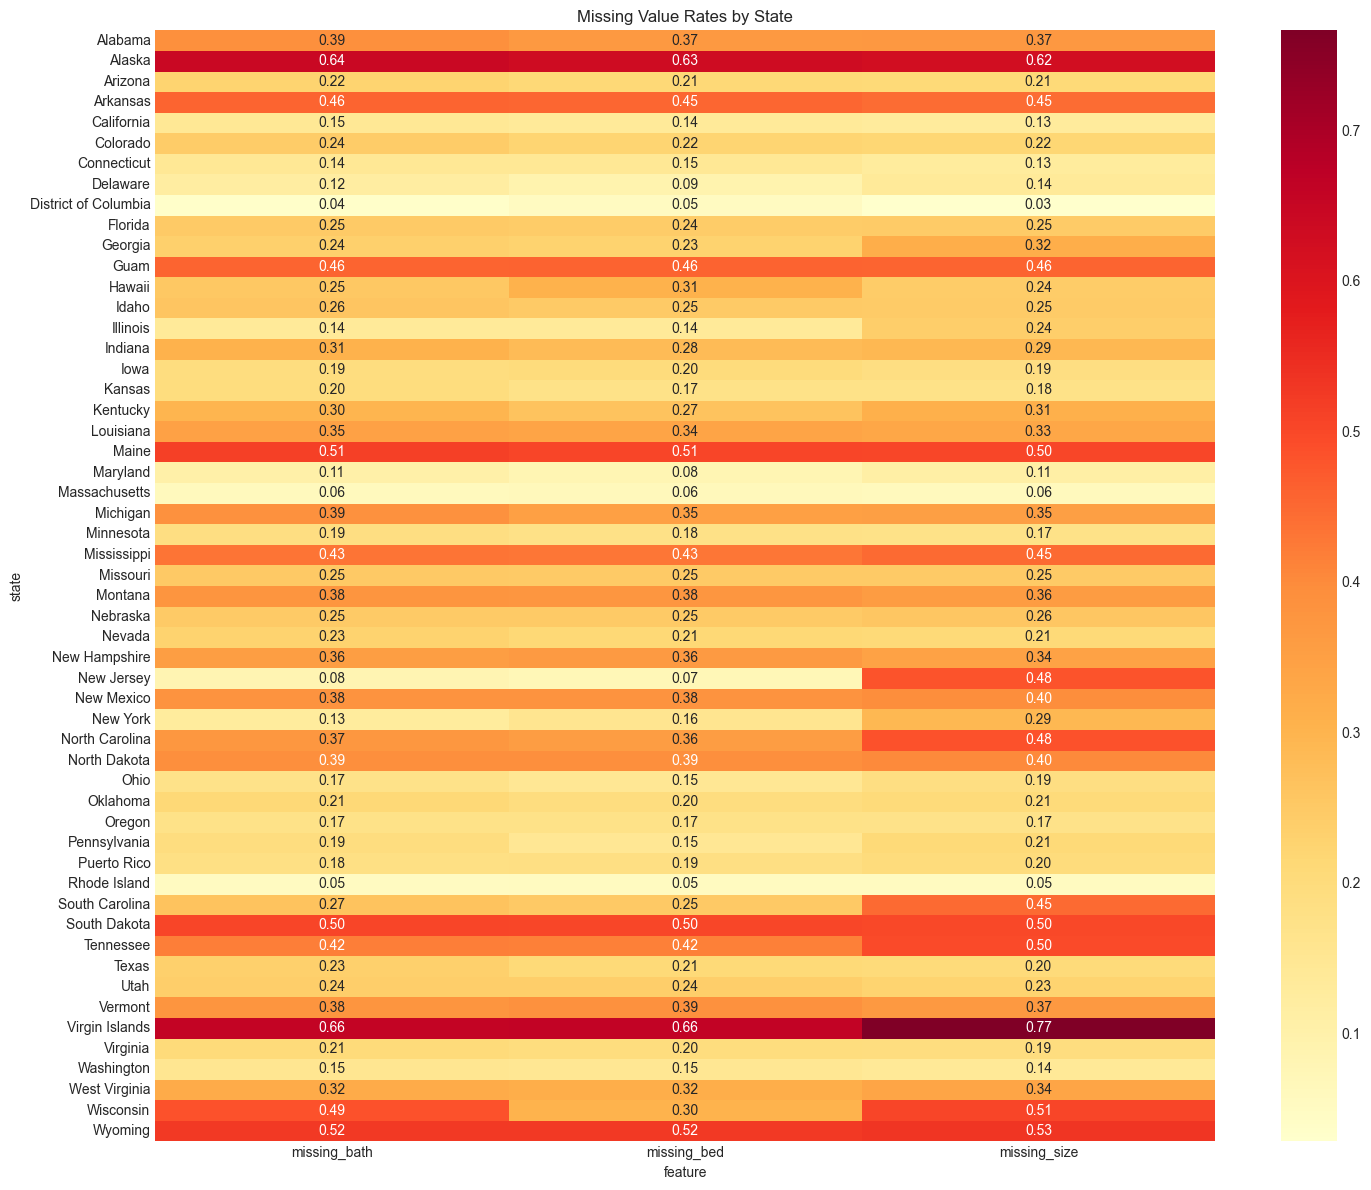

In [18]:
# Create a heat map to visualize missing rate by state
# First, calculate missing rates for each state
state_missing_rates = df.groupby('state')[['missing_size', 'missing_bed', 'missing_bath']].mean()

# Reshape for a heatmap
state_missing_rates_heat = state_missing_rates.reset_index()
state_missing_rates_heat = state_missing_rates_heat.melt(
    id_vars=['state'], 
    value_vars=['missing_size', 'missing_bed', 'missing_bath'],
    var_name='feature', 
    value_name='missing_rate'
)

# Plot the heatmap
plt.figure(figsize=(15, 12))
pivot_table = state_missing_rates_heat.pivot(index='state', columns='feature', values='missing_rate')
sns.heatmap(pivot_table, annot=True, cmap='YlOrRd', fmt='.2f')
plt.title('Missing Value Rates by State')
plt.tight_layout()
plt.show()

#### Let's now fill in mising values with targetted imputation

In [19]:
# First, let's create a copy of the original dataframe to work with
df_processed = df.copy()

# Strategy for "ready_to_build" properties
# Since they all have missing bathrooms by design, it makes sense to set bathrooms to 0
ready_mask = df_processed['status'] == 'ready_to_build'
if ready_mask.sum() > 0:  # Only proceed if we have such properties
    df_processed.loc[ready_mask & df_processed['bath'].isna(), 'bath'] = 0
    print(f"Set bathroom count to 0 for {ready_mask.sum()} 'ready_to_build' properties")

# Check remaining missing values
print("\nRemaining missing values after handling 'ready_to_build' properties:")
print(df_processed[['house_size', 'bed', 'bath']].isna().sum())

Set bathroom count to 0 for 25067 'ready_to_build' properties

Remaining missing values after handling 'ready_to_build' properties:
house_size    568483
bed           481316
bath          486703
dtype: int64


In [20]:
# For numerical imputation, we'll use median values by state and status
# First for house_size
grouped_medians_size = df_processed.groupby(['state', 'status'])['house_size'].median().reset_index()
print("\nSample of median house sizes by state and status:")
print(grouped_medians_size.head())

# Similar approach for bedrooms and bathrooms
grouped_medians_bed = df_processed.groupby(['state', 'status'])['bed'].median().reset_index()
grouped_medians_bath = df_processed.groupby(['state', 'status'])['bath'].median().reset_index()

# Function to apply grouped imputation
def impute_from_groups(row, grouped_medians, column):
    """Impute missing value based on state and status."""
    if pd.isna(row[column]):
        # Find the median for this state and status
        matching_median = grouped_medians[
            (grouped_medians['state'] == row['state']) & 
            (grouped_medians['status'] == row['status'])
        ][column].values
        
        # If we found a matching median, use it
        if len(matching_median) > 0 and not pd.isna(matching_median[0]):
            return matching_median[0]
        
        # Fallback to just state median if state-status combination doesn't exist
        state_median = grouped_medians[grouped_medians['state'] == row['state']][column].median()
        if not pd.isna(state_median):
            return state_median
        
        # Ultimate fallback to global median
        return df_processed[column].median()
    
    # If not missing, return original value
    return row[column]

# Let's apply this to a small sample first to see how it works
sample_size = min(1000, len(df_processed))
sample_df = df_processed.sample(sample_size, random_state=42)

# Apply imputation to the sample
for i, row in sample_df.iterrows():
    if pd.isna(row['house_size']):
        sample_df.at[i, 'house_size'] = impute_from_groups(row, grouped_medians_size, 'house_size')
    if pd.isna(row['bed']):
        sample_df.at[i, 'bed'] = impute_from_groups(row, grouped_medians_bed, 'bed')
    if pd.isna(row['bath']):
        sample_df.at[i, 'bath'] = impute_from_groups(row, grouped_medians_bath, 'bath')

# Check imputation results on the sample
print("\nMissing values in sample before imputation:")
print(df.loc[sample_df.index, ['house_size', 'bed', 'bath']].isna().sum())

print("\nMissing values in sample after imputation:")
print(sample_df[['house_size', 'bed', 'bath']].isna().sum())


Sample of median house sizes by state and status:
     state          status  house_size
0  Alabama        for_sale      1943.0
1  Alabama  ready_to_build      2700.0
2  Alabama            sold      1714.0
3   Alaska        for_sale      1860.0
4  Arizona        for_sale      1810.0

Missing values in sample before imputation:
house_size    251
bed           203
bath          211
dtype: int64

Missing values in sample after imputation:
house_size    0
bed           0
bath          0
dtype: int64


In [26]:
# Apply imputation to the full dataset
print("Starting imputation for the full dataset...")
print(f"Original missing values: house_size: {df_processed['house_size'].isna().sum()}, bed: {df_processed['bed'].isna().sum()}, bath: {df_processed['bath'].isna().sum()}")

# Apply to house_size
for state in df_processed['state'].unique():
    for status in df_processed['status'].unique():
        # Find the median for this combination
        median_size = grouped_medians_size[
            (grouped_medians_size['state'] == state) & 
            (grouped_medians_size['status'] == status)
        ]['house_size'].values
        
        if len(median_size) > 0 and not pd.isna(median_size[0]):
            # Apply imputation for this state-status combination
            mask = (df_processed['state'] == state) & (df_processed['status'] == status) & (df_processed['house_size'].isna())
            df_processed.loc[mask, 'house_size'] = median_size[0]

# Apply similar process for bed and bath
for state in df_processed['state'].unique():
    for status in df_processed['status'].unique():
        # Bedrooms
        median_bed = grouped_medians_bed[
            (grouped_medians_bed['state'] == state) & 
            (grouped_medians_bed['status'] == status)
        ]['bed'].values
        
        if len(median_bed) > 0 and not pd.isna(median_bed[0]):
            mask = (df_processed['state'] == state) & (df_processed['status'] == status) & (df_processed['bed'].isna())
            df_processed.loc[mask, 'bed'] = median_bed[0]
        
        # Bathrooms
        median_bath = grouped_medians_bath[
            (grouped_medians_bath['state'] == state) & 
            (grouped_medians_bath['status'] == status)
        ]['bath'].values
        
        if len(median_bath) > 0 and not pd.isna(median_bath[0]):
            mask = (df_processed['state'] == state) & (df_processed['status'] == status) & (df_processed['bath'].isna())
            df_processed.loc[mask, 'bath'] = median_bath[0]

# Handle any remaining missing values with global medians
if df_processed['house_size'].isna().sum() > 0:
    global_median_size = df_processed['house_size'].median()
    df_processed['house_size'].fillna(global_median_size, inplace=True)

if df_processed['bed'].isna().sum() > 0:
    global_median_bed = df_processed['bed'].median()
    df_processed['bed'].fillna(global_median_bed, inplace=True)

if df_processed['bath'].isna().sum() > 0:
    global_median_bath = df_processed['bath'].median()
    df_processed['bath'].fillna(global_median_bath, inplace=True)

# Check final missing value counts
print(f"Final missing values: house_size: {df_processed['house_size'].isna().sum()}, bed: {df_processed['bed'].isna().sum()}, bath: {df_processed['bath'].isna().sum()}")

Starting imputation for the full dataset...
Original missing values: house_size: 568483, bed: 481316, bath: 486703
Final missing values: house_size: 0, bed: 0, bath: 0


/var/folders/j3/n1zgv5yd3h9_lk6htkm9rmbc0000gn/T/ipykernel_52575/35783172.py:45: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_processed['house_size'].fillna(global_median_size, inplace=True)
/var/folders/j3/n1zgv5yd3h9_lk6htkm9rmbc0000gn/T/ipykernel_52575/35783172.py:49: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are se

In [28]:
df_processed

,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date,missing_size,missing_bed,missing_bath,acre_lot_imputed
0,103378.0,for_sale,105000.0,3.0,2.0,0.12,1962661.0,Adjuntas,Puerto Rico,601.0,920.0,NaN,0,0,0,0
1,52707.0,for_sale,80000.0,4.0,2.0,0.08,1902874.0,Adjuntas,Puerto Rico,601.0,1527.0,NaN,0,0,0,0
2,103379.0,for_sale,67000.0,2.0,1.0,0.15,1404990.0,Juana Diaz,Puerto Rico,795.0,748.0,NaN,0,0,0,0
3,31239.0,for_sale,145000.0,4.0,2.0,0.10,1947675.0,Ponce,Puerto Rico,731.0,1800.0,NaN,0,0,0,0
4,34632.0,for_sale,65000.0,6.0,2.0,0.05,331151.0,Mayaguez,Puerto Rico,680.0,1490.0,NaN,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2226377,23009.0,sold,359900.0,4.0,2.0,0.33,353094.0,Richland,Washington,99354.0,3600.0,2022-03-25,0,0,0,0
2226378,18208.0,sold,350000.0,3.0,2.0,0.10,1062149.0,Richland,Washington,99354.0,1616.0,2022-03-25,0,0,0,0
2226379,76856.0,sold,440000.0,6.0,3.0,0.50,405677.0,Richland,Washington,99354.0,3200.0,2022-03-24,0,0,0,0
2226380,53618.0,sold,179900.0,2.0,1.0,0.09,761379.0,Richland,Washington,99354.0,933.0,2022-03-24,0,0,0,0


In [27]:
df_processed.isna().sum()

brokered_by           4533
status                   0
price                 1541
bed                      0
bath                     0
acre_lot                 0
street               10866
city                  1407
state                    8
zip_code               299
house_size               0
prev_sold_date      734297
missing_size             0
missing_bed              0
missing_bath             0
acre_lot_imputed         0
dtype: int64

In [23]:
# Check missing acre_lot values
missing_acre_lot = df_processed['acre_lot'].isna().sum()
missing_percentage = (missing_acre_lot / len(df_processed)) * 100
print(f"Missing acre_lot values: {missing_acre_lot} ({missing_percentage:.2f}%)")

# Calculate median acre_lot by state and status
grouped_medians_acre = df_processed.groupby(['state', 'status'])['acre_lot'].median().reset_index()
print("\nSample of median acre_lot by state and status:")
print(grouped_medians_acre.head())

# Apply imputation for acre_lot
# First for state-status combinations
for state in df_processed['state'].unique():
    for status in df_processed['status'].unique():
        median_acre = grouped_medians_acre[
            (grouped_medians_acre['state'] == state) & 
            (grouped_medians_acre['status'] == status)
        ]['acre_lot'].values
        
        if len(median_acre) > 0 and not pd.isna(median_acre[0]):
            mask = (df_processed['state'] == state) & (df_processed['status'] == status) & (df_processed['acre_lot'].isna())
            df_processed.loc[mask, 'acre_lot'] = median_acre[0]

# Then for any remaining missing values, use state medians
for state in df_processed['state'].unique():
    state_median = grouped_medians_acre[grouped_medians_acre['state'] == state]['acre_lot'].median()
    if not pd.isna(state_median):
        mask = (df_processed['state'] == state) & (df_processed['acre_lot'].isna())
        df_processed.loc[mask, 'acre_lot'] = state_median

# Finally, use global median for any still-missing values
remaining_missing = df_processed['acre_lot'].isna().sum()
if remaining_missing > 0:
    global_median = df_processed['acre_lot'].median()
    df_processed['acre_lot'].fillna(global_median, inplace=True)

# Create flag for imputed acre_lot values
df_processed['acre_lot_imputed'] = df['acre_lot'].isna().astype(int)

# Verify all missing values are now handled
final_missing = df_processed['acre_lot'].isna().sum()
print(f"\nRemaining missing acre_lot values after imputation: {final_missing}")
print(f"Percentage of imputed acre_lot values: {df_processed['acre_lot_imputed'].mean():.2%}")

Missing acre_lot values: 325589 (14.62%)

Sample of median acre_lot by state and status:
     state          status  acre_lot
0  Alabama        for_sale     0.700
1  Alabama  ready_to_build       NaN
2  Alabama            sold     0.410
3   Alaska        for_sale     1.405
4  Arizona        for_sale     0.240

Remaining missing acre_lot values after imputation: 0
Percentage of imputed acre_lot values: 14.62%


/var/folders/j3/n1zgv5yd3h9_lk6htkm9rmbc0000gn/T/ipykernel_52575/2193913076.py:35: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_processed['acre_lot'].fillna(global_median, inplace=True)


In [29]:
df_processed.isna().sum()

brokered_by           4533
status                   0
price                 1541
bed                      0
bath                     0
acre_lot                 0
street               10866
city                  1407
state                    8
zip_code               299
house_size               0
prev_sold_date      734297
missing_size             0
missing_bed              0
missing_bath             0
acre_lot_imputed         0
dtype: int64

In [30]:
# Check missing price values
missing_price = df_processed['price'].isna().sum()
missing_percentage = (missing_price / len(df_processed)) * 100
print(f"Missing price values: {missing_price} ({missing_percentage:.2f}%)")

Missing price values: 1541 (0.07%)


In [31]:
# Remove rows with missing values in key columns
df_processed = df_processed.dropna(subset=['price', 'street', 'city', 'zip_code', 'state', 'brokered_by'])

# Print summary of remaining data
print(f"Rows remaining after removing missing values: {len(df_processed):,}")
print("\nMissing values in each column:")
print(df_processed.isna().sum())

Rows remaining after removing missing values: 2,207,980

Missing values in each column:
brokered_by              0
status                   0
price                    0
bed                      0
bath                     0
acre_lot                 0
street                   0
city                     0
state                    0
zip_code                 0
house_size               0
prev_sold_date      725581
missing_size             0
missing_bed              0
missing_bath             0
acre_lot_imputed         0
dtype: int64


In [32]:
df_processed.drop(columns=['prev_sold_date'],inplace=True)

/var/folders/j3/n1zgv5yd3h9_lk6htkm9rmbc0000gn/T/ipykernel_52575/2123342422.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_processed.drop(columns=['prev_sold_date'],inplace=True)


In [33]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

In [40]:
encoder = LabelEncoder()
df_processed['street_encoded'] = encoder.fit_transform(df_processed['street'].astype(str))
df_processed['street'] = encoder.inverse_transform(df_processed['street_encoded'])

In [41]:
df_processed.drop(columns=['street_encoded'], inplace=True)

In [36]:
df_processed.shape

(2207980, 15)

In [42]:
df_processed.drop_duplicates(inplace=True)
df_processed.shape

(2207279, 15)

In [44]:
import os
from sklearn.preprocessing import LabelEncoder
import joblib

# Ensure the "encoders" directory exists
os.makedirs("../encoders", exist_ok=True)

# Initialize dictionary to store encoders
encoders = {}

# List of categorical features
categorical_features = ['city', 'state', 'status', 'brokered_by']

In [45]:
# Ensure all categorical values are strings and handle missing values
for feature in categorical_features:
    le = LabelEncoder()

    # Convert all values to strings and replace NaN with "Unknown"
    df_processed[feature] = df_processed[feature].astype(str).fillna("Unknown")

    # Fit and transform
    df_processed[feature] = le.fit_transform(df_processed[feature])

    # Save encoder and class mappings
    joblib.dump({'encoder': le, 'classes': le.classes_}, f'../encoders/{feature}_encoder.pkl')
    print(f'{feature} encoder saved to encoders/{feature}_encoder.pkl')

print("Encoders saved successfully!")

city encoder saved to encoders/city_encoder.pkl
state encoder saved to encoders/state_encoder.pkl
status encoder saved to encoders/status_encoder.pkl
brokered_by encoder saved to encoders/brokered_by_encoder.pkl
Encoders saved successfully!


#### Handling Outliers

In [46]:
# Calculate the IQR for each feature
num_features=['bed', 'bath', 'house_size', 'acre_lot', 'zip_code', 'price']

for column in num_features:
    Q1 = df_processed[column].quantile(0.25)
    Q3 = df_processed[column].quantile(0.75)
    IQR = Q3 - Q1
    # Define the lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Remove outliers
    df_processed= df_processed[(df_processed[column] >= lower_bound) & (df_processed[column] <= upper_bound)]

In [47]:
df_processed.shape

(1482089, 15)

#### Hadnling Skewness

In [48]:
# Identify numerical features (exclude label-encoded columns if necessary)
numerical_features = ['bed', 'bath', 'house_size', 'acre_lot', 'zip_code', 'price']  # Update based on your data

# Check skewness only on numerical columns
skewness = df_processed[numerical_features].skew()
print(skewness)

bed           0.413408
bath          0.344561
house_size    0.333903
acre_lot      1.908955
zip_code      0.137037
price         0.724719
dtype: float64


In [ ]:
# Apply log transformation (be sure to add 1 to avoid log(0) issues)
df_processed['bed_log'] = np.log1p(df_processed['bed'])  # log(x + 1)
df_processed['bath_log'] = np.log1p(df_processed['bath'])
df_processed['house_size_log'] = np.log1p(df_processed['house_size'])
df_processed['acre_lot_log'] = np.log1p(df_processed['acre_lot'])
df_processed['price_log'] = np.log1p(df_processed['price'])

# Check skewness again
print(df_processed[['bed_log', 'bath_log', 'house_size_log', 'acre_lot_log', 'price_log']].skew())

bed_log          -0.098398
bath_log         -0.327995
house_size_log   -0.452731
acre_lot_log      1.465882
price_log        -1.521583
dtype: float64


In [50]:
# Apply square root transformation to acre_lot
df_processed['acre_lot_sqrt'] = np.sqrt(df_processed['acre_lot'])

# Check the skewness after square root transformation
print(df_processed[['acre_lot_sqrt']].skew())

acre_lot_sqrt    1.02176
dtype: float64


In [51]:
# Apply cube root transformation to acre_lot
df_processed['acre_lot_cbrt'] = np.cbrt(df_processed['acre_lot'])

# Check the skewness after cube root transformation
print(df_processed[['acre_lot_cbrt']].skew())

acre_lot_cbrt    0.599892
dtype: float64


In [52]:
# Apply square root transformation to price_lot
df_processed['price_sqrt'] = np.sqrt(df_processed['price'])

# Check the skewness after square root transformation
print(df_processed[['price_sqrt']].skew())

price_sqrt   -0.119204
dtype: float64


In [55]:
pd.set_option('display.max_columns', None)
df_processed

,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,missing_size,missing_bed,missing_bath,acre_lot_imputed,bed_log,bath_log,house_size_log,acre_lot_log,price_log,acre_lot_sqrt,acre_lot_cbrt,price_sqrt
0,3738,0,105000.0,3.0,2.0,0.12,1962661.0,81,40,601.0,920.0,0,0,0,0,1.386294,1.098612,6.825460,0.113329,11.561725,0.346410,0.493242,324.037035
1,57320,0,80000.0,4.0,2.0,0.08,1902874.0,81,40,601.0,1527.0,0,0,0,0,1.609438,1.098612,7.331715,0.076961,11.289794,0.282843,0.430887,282.842712
2,3739,0,67000.0,2.0,1.0,0.15,1404990.0,8620,40,795.0,748.0,0,0,0,0,1.098612,0.693147,6.618739,0.139762,11.112463,0.387298,0.531329,258.843582
3,33588,0,145000.0,4.0,2.0,0.10,1947675.0,14015,40,731.0,1800.0,0,0,0,0,1.609438,1.098612,7.496097,0.095310,11.884496,0.316228,0.464159,380.788655
5,3738,0,179000.0,4.0,3.0,0.46,1850806.0,15544,40,612.0,2520.0,0,0,0,0,1.609438,1.386294,7.832411,0.378436,12.095147,0.678233,0.771944,423.083916
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2226374,58598,2,310000.0,3.0,1.0,0.21,500240.0,14757,50,99354.0,1152.0,0,0,0,0,1.386294,0.693147,7.050123,0.190620,12.644331,0.458258,0.594392,556.776436
2226375,66095,2,385000.0,4.0,2.0,0.21,210890.0,14757,50,99354.0,1656.0,0,0,0,0,1.609438,1.098612,7.412764,0.190620,12.861001,0.458258,0.594392,620.483682
2226376,93619,2,339900.0,4.0,2.0,0.20,41160.0,14757,50,99354.0,2780.0,0,0,0,0,1.609438,1.098612,7.930566,0.182322,12.736410,0.447214,0.584804,583.009434
2226378,19180,2,350000.0,3.0,2.0,0.10,1062149.0,14757,50,99354.0,1616.0,0,0,0,0,1.386294,1.098612,7.388328,0.095310,12.765691,0.316228,0.464159,591.607978


In [56]:
df_processed.drop(columns=['missing_size', 'missing_bed', 'missing_bath', 'acre_lot_imputed', 'price_log', 'acre_lot_sqrt', 'price', 'acre_lot_log', 'acre_lot', 'bed', 'bath', 'house_size'], axis=1, inplace=True)

In [57]:
df_processed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1482089 entries, 0 to 2226380
Data columns (total 11 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   brokered_by     1482089 non-null  int64  
 1   status          1482089 non-null  int64  
 2   street          1482089 non-null  object 
 3   city            1482089 non-null  int64  
 4   state           1482089 non-null  int64  
 5   zip_code        1482089 non-null  float64
 6   bed_log         1482089 non-null  float64
 7   bath_log        1482089 non-null  float64
 8   house_size_log  1482089 non-null  float64
 9   acre_lot_cbrt   1482089 non-null  float64
 10  price_sqrt      1482089 non-null  float64
dtypes: float64(6), int64(4), object(1)
memory usage: 135.7+ MB


In [58]:
df_processed.skew()

brokered_by       0.060539
status            0.392585
street            0.010906
city             -0.052279
state             0.096685
zip_code          0.137037
bed_log          -0.098398
bath_log         -0.327995
house_size_log   -0.452731
acre_lot_cbrt     0.599892
price_sqrt       -0.119204
dtype: object

In [39]:
df_processed.to_csv('../data/processed/realtor-data-imputed.csv', index = False)